<a href="https://colab.research.google.com/github/Nagalakshmi136/Ipo-data/blob/master/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries


In [24]:
import pandas as pd
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    classification_report,
    confusion_matrix,
)
import seaborn as sns
import plotly.express as px
import seaborn as sns
from sklearn.utils.multiclass import unique_labels


#Loading Data

In [ ]:
def load_data(data_path: str) -> pd.DataFrame:
    """
    Loads the data from given csv file path
    Params:
      data_path (str): data file path
    Returns:
      data_df (pd.DataFrame): DataFrame contains the data from file
    """

    data_df = pd.read_csv(data_path)

    return data_df

In [ ]:
df = pd.read_csv('sample_data/stock_data/GOOGL_2006-01-01_to_2018-01-01.csv')


In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


#Stock Analysis


##Data Preprocessing

In [ ]:
df.describe()

,Open,High,Low,Close,Volume
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3019 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3019 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3019 non-null   float64
 5   Volume  3019 non-null   int64  
 6   Name    3019 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.2+ KB


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Name,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop('Name',axis=1,inplace=True)

In [ ]:
temp_df=df.drop('Date', axis=1)

In [ ]:
temp_df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999894,0.999841,0.999742,-0.443155
High,0.999894,1.000000,0.999827,0.999866,-0.440717
Low,0.999841,0.999827,1.000000,0.999896,-0.447781
Close,0.999742,0.999866,0.999896,1.000000,-0.444590
Volume,-0.443155,-0.440717,-0.447781,-0.444590,1.000000


##Data Visualization

In [ ]:
fig = px.histogram(df,
                   x='Close',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.histogram(df,
                   x='Open',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

In [26]:
fig = px.scatter(df,
                 x='Open',
                 y='Close',

                 opacity=0.8,

                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

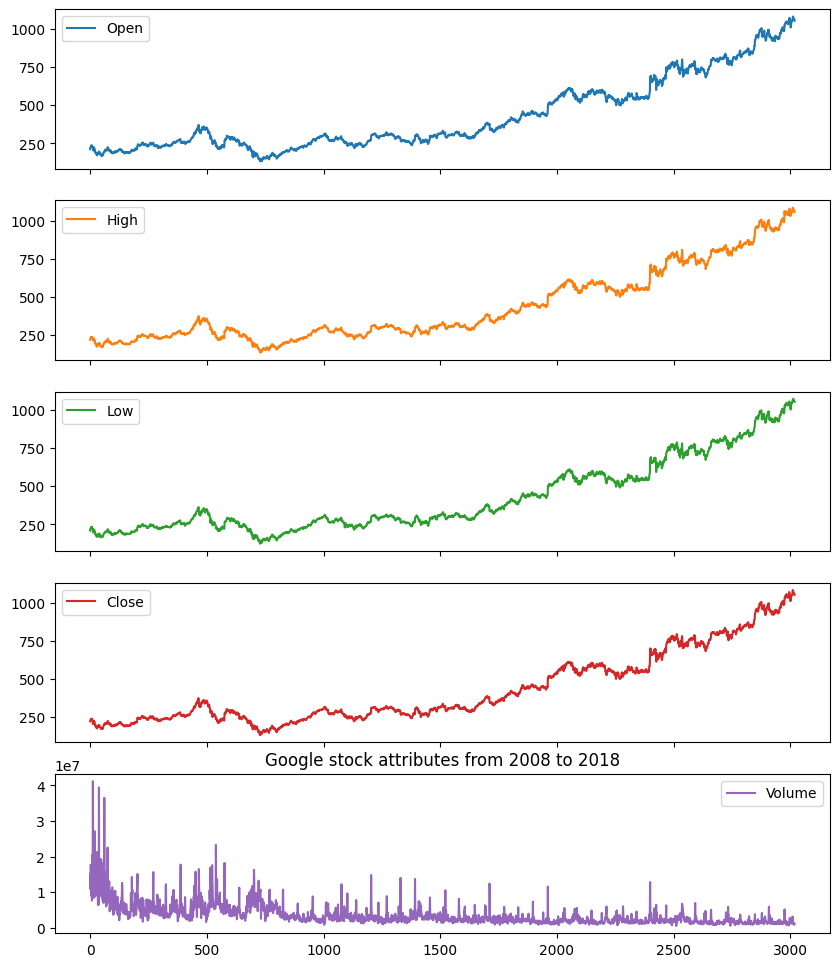

In [28]:
df.plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2018')
plt.show()

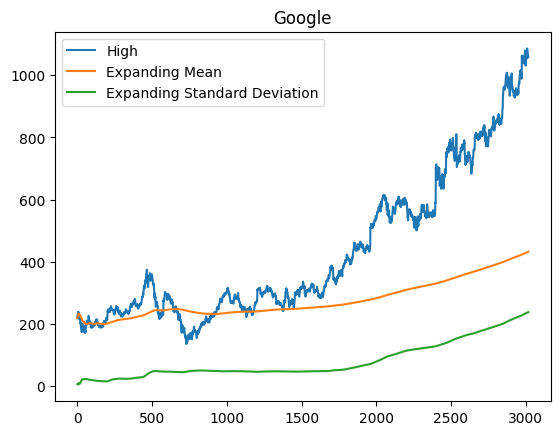

In [29]:
# Expanding window functions
google_mean = df.High.expanding().mean()
google_std = df.High.expanding().std()
df.High.plot()
google_mean.plot()
google_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Google')
plt.show()

#Trend Analysis

In [30]:
from pylab import rcParams
import statsmodels.api as sm

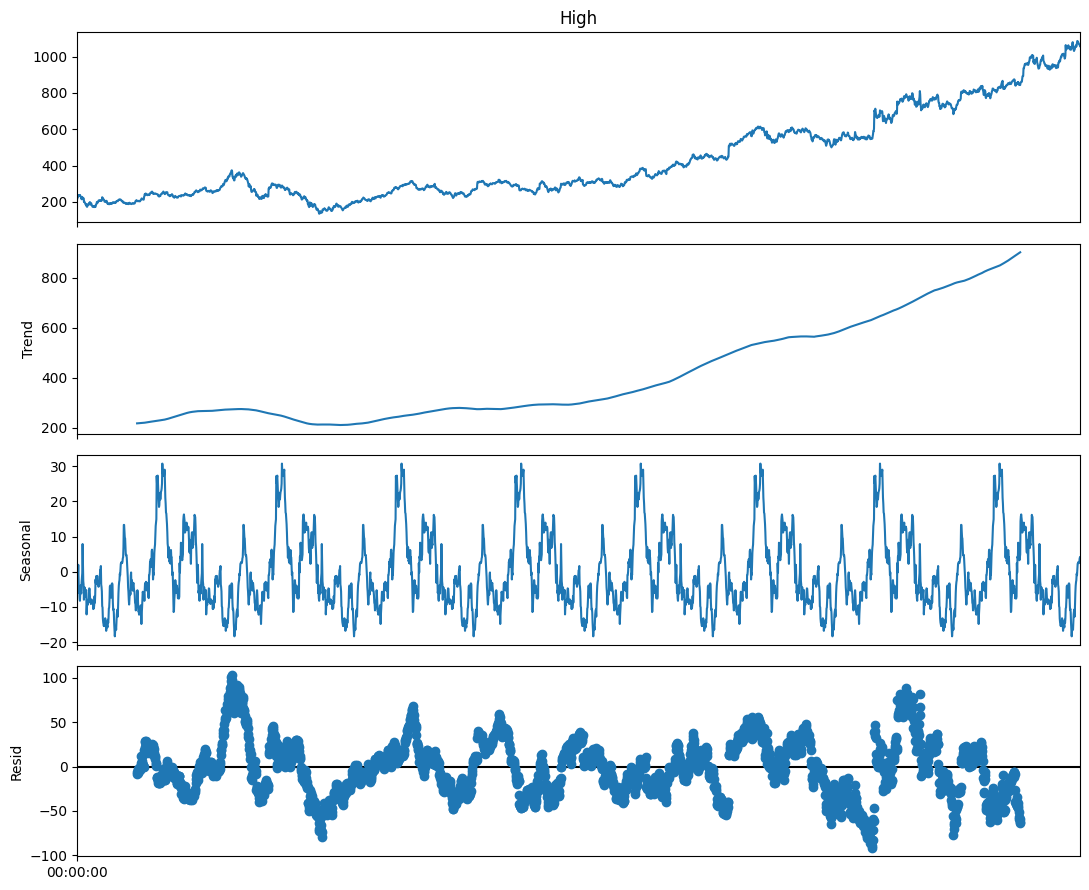

In [36]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(df["High"],period=360)
figure = decomposed_google_volume.plot()
plt.show()

There is a very slow increasing trend until 2012, but after 2012 there was an exponential high trend. And very high seasonality.

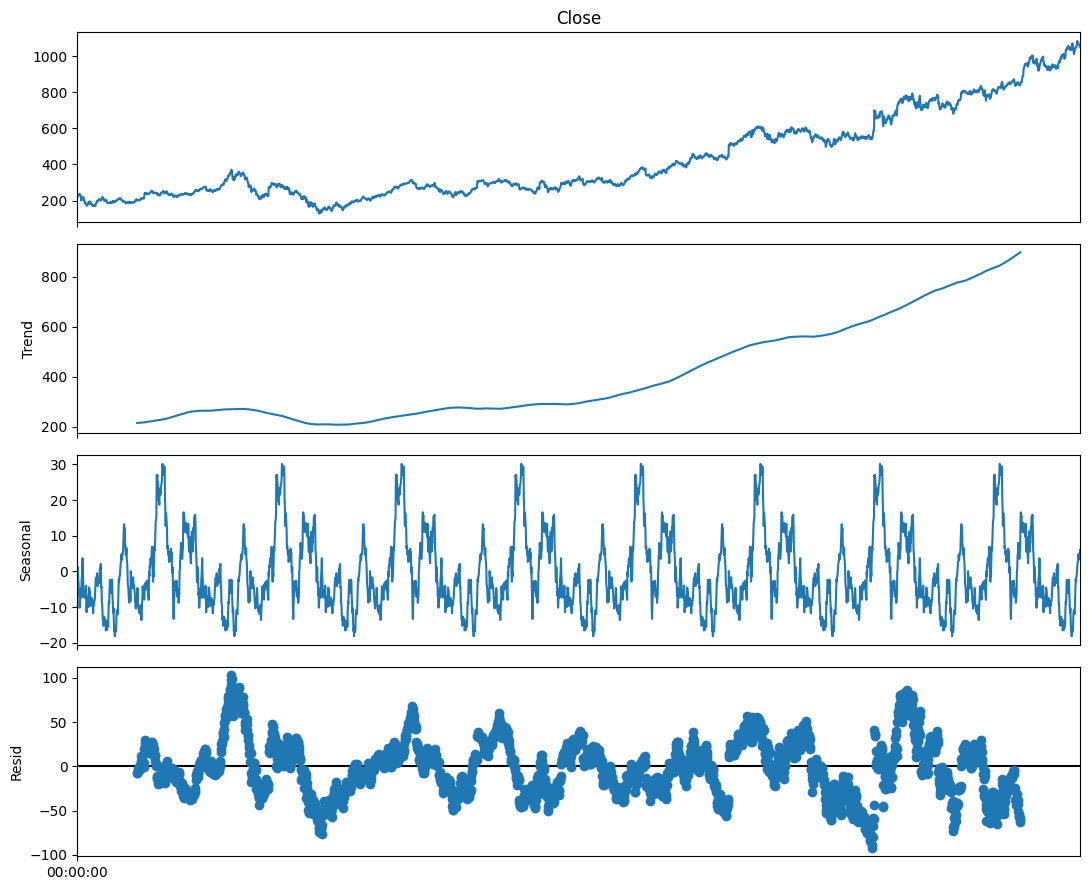

In [39]:
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(df["Close"],period=360)
figure = decomposed_google_volume.plot()
plt.show()

#Prediction